In [4]:
import numpy as np, scipy as sp
import time
from matplotlib import pyplot as p
from importlib import reload

Let $J$ be the random variable with $\mathbb P(J = j) = 1/j(j+1)$.

If we currently have $x$ active sites, then one step works like this:
* the rightmost active chip falls asleep with probability $q$.
* it moves left with probability $(1-q)/2$, and then randomly walks until it returns to the origin. This will wake up $J$ sites to the left of the chip, but $x - 1$ were already awake anyway, so the new number of awake sites is $(J+1) \vee x$.
* it moves right with probability $(1-q)/2$, and then randomly walks until it returns to the origin. This wakes up $J$ sites to the left of the chip which were asleep at first, so the number of awake sites is $J + x$.


## the behaviour of sums of many J

The characteristic function of $J$ is $$F(\theta) := \mathbb E[e^{i\theta J}] = (e^{-i\theta} - 1) \log(1 - e^{i\theta}) + 1,$$ where we are using the principal branch.

Let $S_N$ be the sum of $N$ independent copies of $J$. Its characteristic function is
$F(\theta)^N = [1 + (e^{-i\theta} - 1) \log(1 - e^{i\theta})]^N$.

Here $e^{-i\theta} - 1 = -i\theta (1 + O(\theta))$ and $\log(1 - e^{i\theta}) = \log(-i\theta) (1 + O(\theta))$, so

$$F(\theta)^N = \exp(-i \theta N \log(-i \theta) (1 + O(\theta))).$$

This is a nice formula. From this, we can easily get

$${S_N - N \log N \over N} \stackrel{d}{\to} \mathfrak J$$

where $\mathfrak J$ is a random variable with characteristic function $e^{-i\theta \log -i\theta} = e^{-\pi |\theta| / 2 - i \theta \log |\theta|}$.

I think that is the stable distribution for $\alpha = 1$ with $\mu = 0, c = \pi/2, \beta = 1$.

### sampling $S_N$

In [5]:
# we can get samples of j by floor(1/U) where U is uniform on (0, 1]
# floating point isn't perfect but it's close
def generateJ(shape):
    return np.floor(1/np.random.random(shape)).astype(int)
def generate_sum_of_j(count):
    return np.sum(generateJ(count))

In [6]:
many = 1000000

def sample(many):
    samples = []
    count = 100000
    t = time.time()
    print("Generating %d samples of sums of %d independent copies of J" % (count, many))
    for j in range(count):
        samples.append((generate_sum_of_j(many) - many * np.log(many)) / many)
        if time.time() > t + 1:
            print("%d generated" % j)
            t += 1
    return samples

# cumulative distribution function
def cdf(samples):
    x = np.sort(samples)
    y = np.arange(len(samples)) / len(samples)
    #pass
    #x = np.concatenate([[0], x])
    #y = np.concatenate([[0], y])
    p.plot(x, y)

#### Generate the samples

In [7]:
samples_for_n = {}
for many in [10, 100, 1000, 10000, 100000, 1000000]:
    samples_for_n[many] = sample(many)


Generating 100000 samples of sums of 10 independent copies of J
41534 generated
78464 generated
Generating 100000 samples of sums of 100 independent copies of J
33376 generated
67030 generated
Generating 100000 samples of sums of 1000 independent copies of J
25141 generated
46570 generated
68417 generated
91117 generated
Generating 100000 samples of sums of 10000 independent copies of J
5804 generated
10971 generated
16249 generated
21557 generated
27368 generated
32490 generated
37813 generated
43130 generated
48923 generated
54070 generated
59389 generated
65374 generated
70438 generated
75612 generated
80971 generated
87021 generated
92042 generated
97197 generated
Generating 100000 samples of sums of 100000 independent copies of J
578 generated
1254 generated
1826 generated
2406 generated
2999 generated
3675 generated
4286 generated
5045 generated
5680 generated
6355 generated
6924 generated
7618 generated
8249 generated
8953 generated
9538 generated
10173 generated
10761 generated

35593 generated
35685 generated
35777 generated
35869 generated
35962 generated
36054 generated
36145 generated
36237 generated
36329 generated
36421 generated
36513 generated
36605 generated
36697 generated
36789 generated
36881 generated
36973 generated
37065 generated
37157 generated
37249 generated
37342 generated
37434 generated
37526 generated
37618 generated
37710 generated
37802 generated
37894 generated
37986 generated
38078 generated
38170 generated
38262 generated
38355 generated
38447 generated
38539 generated
38631 generated
38723 generated
38815 generated
38907 generated
38999 generated
39091 generated
39183 generated
39275 generated
39367 generated
39459 generated
39551 generated
39643 generated
39735 generated
39827 generated
39919 generated
40011 generated
40103 generated
40195 generated
40287 generated
40379 generated
40471 generated
40563 generated
40655 generated
40747 generated
40839 generated
40931 generated
41023 generated
41115 generated
41207 generated
41299 ge

82841 generated
82933 generated
83026 generated
83118 generated
83210 generated
83302 generated
83394 generated
83486 generated
83578 generated
83670 generated
83762 generated
83855 generated
83948 generated
84040 generated
84132 generated
84224 generated
84316 generated
84408 generated
84500 generated
84592 generated
84684 generated
84776 generated
84868 generated
84960 generated
85052 generated
85144 generated
85236 generated
85328 generated
85420 generated
85512 generated
85604 generated
85696 generated
85788 generated
85880 generated
85973 generated
86065 generated
86157 generated
86249 generated
86341 generated
86433 generated
86525 generated
86617 generated
86709 generated
86801 generated
86893 generated
86985 generated
87077 generated
87169 generated
87261 generated
87353 generated
87446 generated
87538 generated
87630 generated
87722 generated
87814 generated
87906 generated
87998 generated
88090 generated
88182 generated
88274 generated
88366 generated
88458 generated
88550 ge

#### Plot the samples

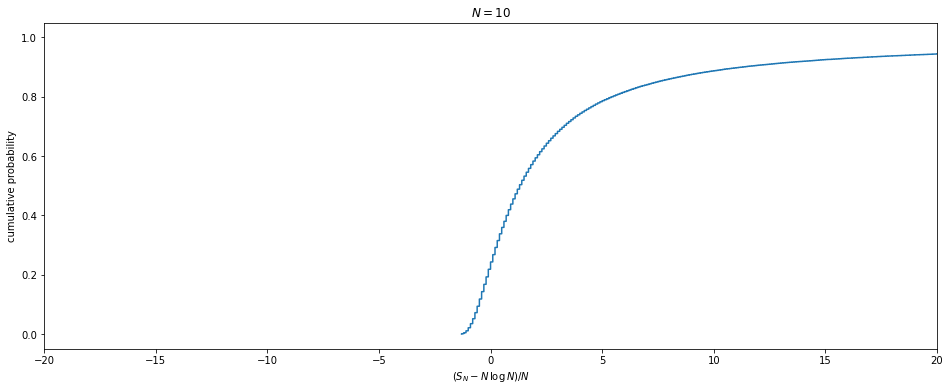

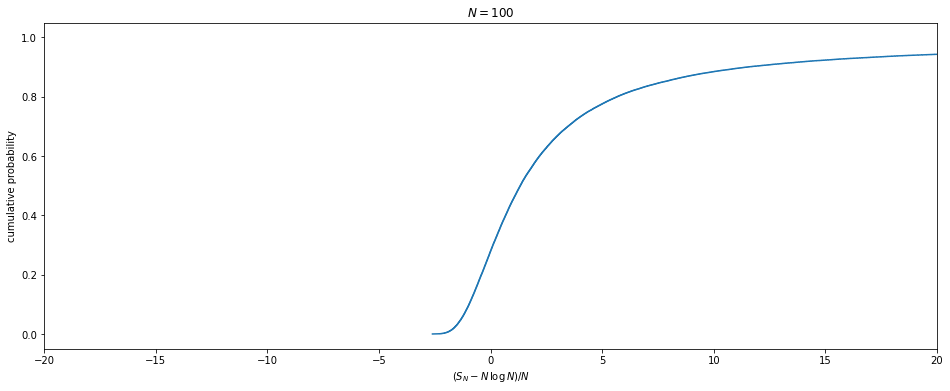

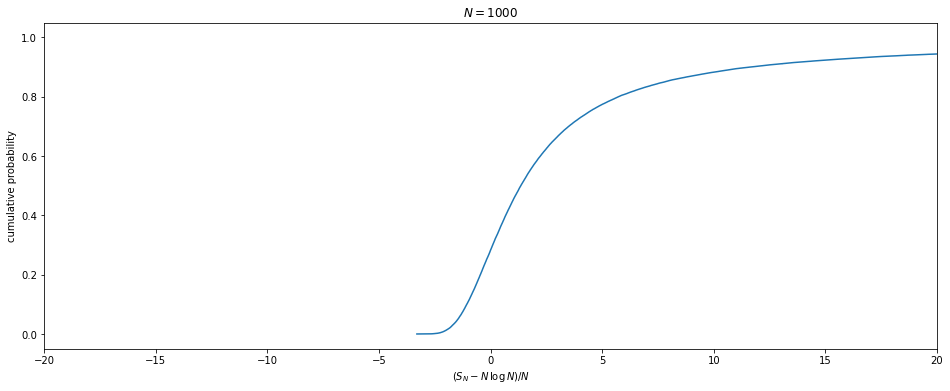

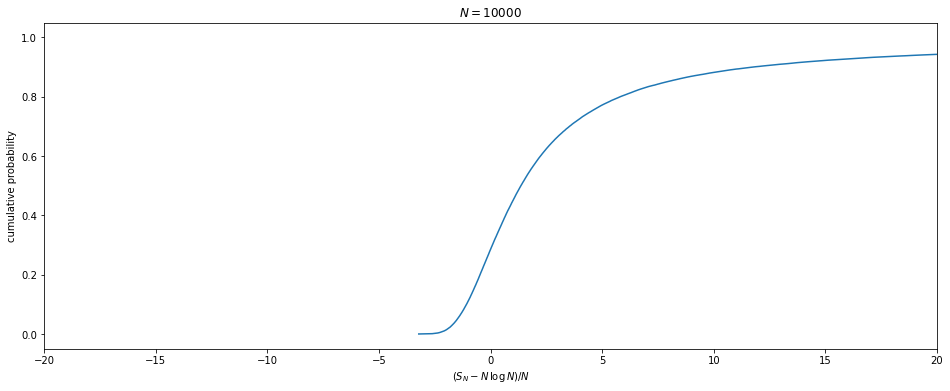

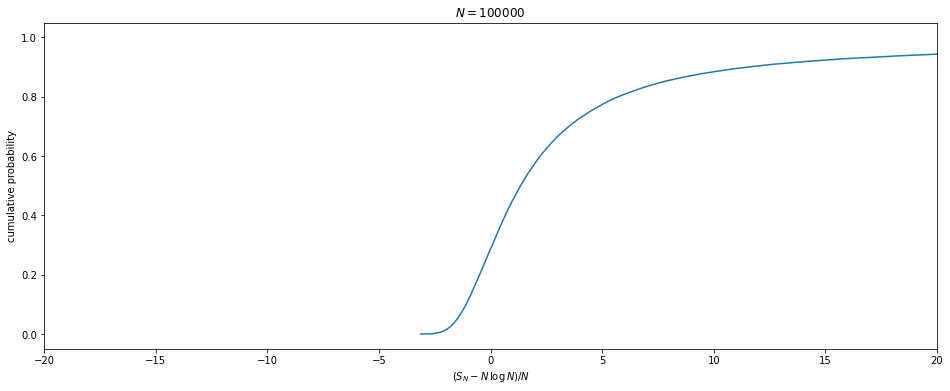

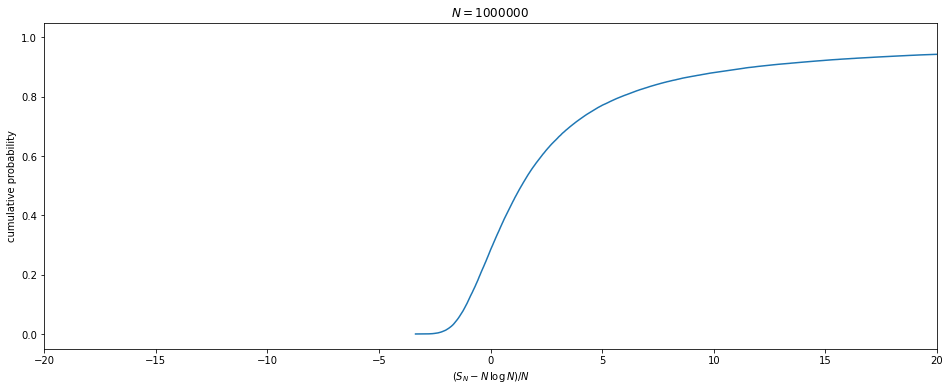

In [13]:
for many in [10, 100, 1000, 10000, 100000, 1000000]:
    p.figure(figsize=(16, 6))
    cdf(samples_for_n[many])
    p.title("$N = %d$" % many)
    p.xlabel("$(S_N - N\,\log\,N) / N$")
    p.ylabel("cumulative probability")
    p.xlim([-20, 20])
    p.show()

### comparing the empirical distribution of $(S_N - N \log N) / N$ to $\mathfrak{J}$

As above, $(S_N - N \log N) / N$ converges in distribution to $\mathfrak J$, which is the random variable with characteristic function $e^{-i\theta\log(-i\theta)} = e^{-\pi|\theta|/2 - i\theta\log|\theta|}$, or the stable distribution with $\alpha = 1, \mu = 0, c = \pi/2, \beta = 1$.

We can get rigorous approximations of things like $\mathbb P(\mathfrak{J} < x)$ by using the formula
$$\mathbb P(X < x) = \frac12 - \frac{1}{2\pi{i}} \lim_{B \to \infty} \int_{-B}^{B} \left({e^{-ix\theta} \mathbb E[e^{iX\theta}] - 1 \over \theta}\right) \,d\theta$$
<!--$$\mathbb P(X < x) = \frac12 - \frac{1}{2\pi} \int_{-\infty}^{\infty} \mathop{\text{Im}} {e^{-ix\theta} \mathbb E[e^{iX\theta}] \over \theta} \,d\theta.$$-->

It would be nice to evaluate this integral with rigorous bounds for some values like $x = 0$. We can truncate it at e.g. $B = 100$ with very little error because $|\mathbb E[e^{iX\theta}]| = e^{-\pi |\theta| / 2}$ and $1/\theta$ cancels out on $[-B,-1] \cup [1,B]$. There is only a logarithmic singularity at zero, so the numerical integration routines in numpy work okay, but of course the bounds aren't rigorous. Anyway, it's plotted and compared to empirical estimate.

In [20]:
import scipy.integrate

We compute the integral
$$\mathbb P(\mathfrak{J} < x) \approx {1 \over 2} - {1 \over 2 \pi i} \int_{-100}^{100} {e^{-ix\theta} \mathbb E[e^{iX\theta}] - 1 \over \theta} \,d\theta = {1 \over 2} - \int_{-100}^{100} {1 \over 2\pi \theta} \mathop{\text{Im}} (e^{-ix\theta} \mathbb E[e^{iX\theta}] - 1) \,d\theta$$

In our case, it is
$${1 \over 2} + \int_0^\infty {1 \over \pi \theta} e^{-\pi|\theta| / 2} \sin((x + \log |\theta|) \theta) \,d\theta.$$

#### a general function to compute cdf from cf

In [43]:
def cf_to_cdf(cf, x):
    "Given a characteristic function, compute P(X < x) by doing the funky integral."
    def f(z):
        return np.imag(cf(z) * np.exp(-1j*x*z) - cf(0)) / z / 2 / np.pi
    left_int, left_err = scipy.integrate.quad(f, -100, 0)
    right_int, right_err = scipy.integrate.quad(f, 0, 100)
    return 0.5 - (left_int + right_int)

class curlyj:
    @staticmethod
    def cf(theta):
        if theta == 0:
            return 1
        return np.exp(-1j*theta*np.log(-1j*theta))

    @staticmethod
    def cdf(xx):
        return cf_to_cdf(curlyj.cf, xx)


#### a test of the integral method

#### a function that specifically finds P($\mathfrak J$ < x)

In [57]:
def jcdf(x):
    def f(theta):
        return np.sin((x + np.log(theta)) * theta) * np.exp(-np.pi * theta / 2) / np.pi / theta
    val, error = scipy.integrate.quad(f, 0, 100)
    return 0.5 + val


#### compare curlyj.cdf and jcdf to see if they are the same

In [61]:
err = 0
for x in np.linspace(-4, 4, 41):
    err = max(err, abs(curlyj.cdf(x) - jcdf(x)))
print("compared curlyj.cdf and jcdf. largest difference is", err)

compared curlyj.cdf and jcdf. largest difference is 3.968103623464003e-11


<ipython-input-43-7fec309bbc7f>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-43-7fec309bbc7f>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)
<ipython-input-57-cc77aa20d859>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, error = scipy.integrate.quad(f, 0, 100)


In [82]:
class cauchy:
    @staticmethod
    def cf(theta):
        return np.exp(-np.abs(theta))
    
    @staticmethod
    def cdf(xx):
        return cf_to_cdf(cauchy.cf, xx)

print("cauchy: comparing integral to the exact value")
print("x       integral        exact")
for x in np.linspace(-4, 4, 41):
    value = np.arctan(x) / np.pi + 0.5
    integral = cauchy.cdf(x)
    print("%+-3.1f    %-12.9f    %-8.9f" % (x, integral, value))


cauchy: comparing integral to the exact value
x       integral        exact
-4.0    0.077979130     0.077979130
-3.8    0.081908682     0.081908682
-3.6    0.086245061     0.086245061
-3.4    0.091053002     0.091053002
-3.2    0.096411248     0.096411248
-3.0    0.102416382     0.102416382
-2.8    0.109187911     0.109187911
-2.6    0.116875061     0.116875061
-2.4    0.125665916     0.125665916
-2.2    0.135799749     0.135799749
-2.0    0.147583618     0.147583618
-1.8    0.161414467     0.161414467
-1.6    0.177807684     0.177807684
-1.4    0.197431543     0.197431543
-1.2    0.221142062     0.221142062
-1.0    0.250000000     0.250000000
-0.8    0.285223287     0.285223287
-0.6    0.327979130     0.327979130
-0.4    0.378881058     0.378881058
-0.2    0.437167042     0.437167042
+0.0    0.500000000     0.500000000
+0.2    0.562832958     0.562832958
+0.4    0.621118942     0.621118942
+0.6    0.672020870     0.672020870
+0.8    0.714776713     0.714776713
+1.0    0.750000000     

###

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


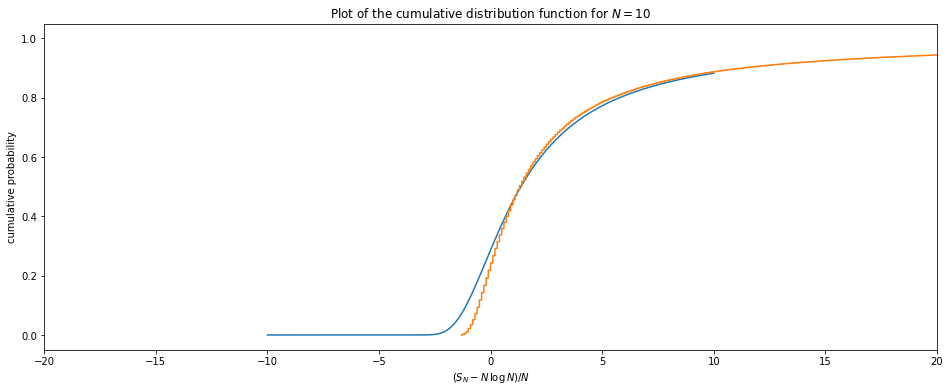

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


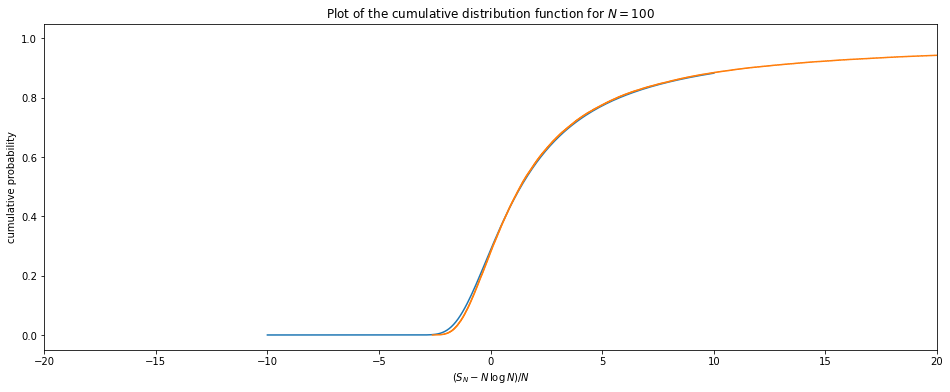

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


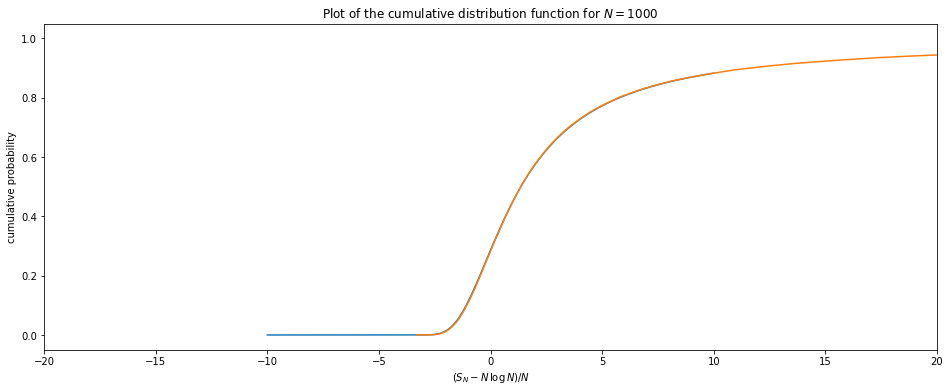

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


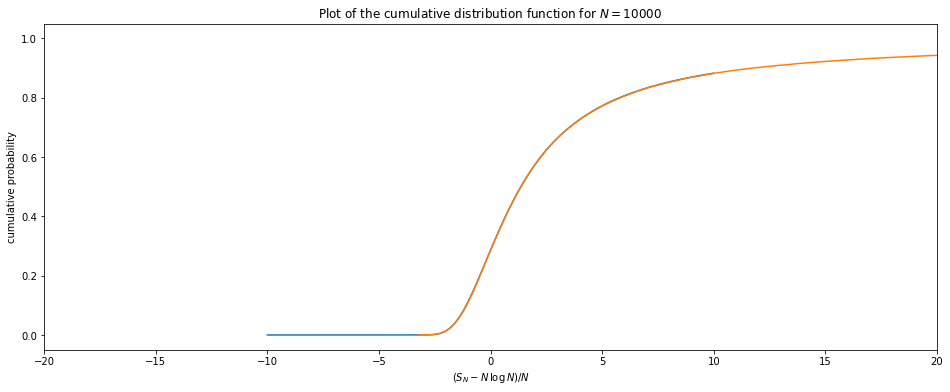

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


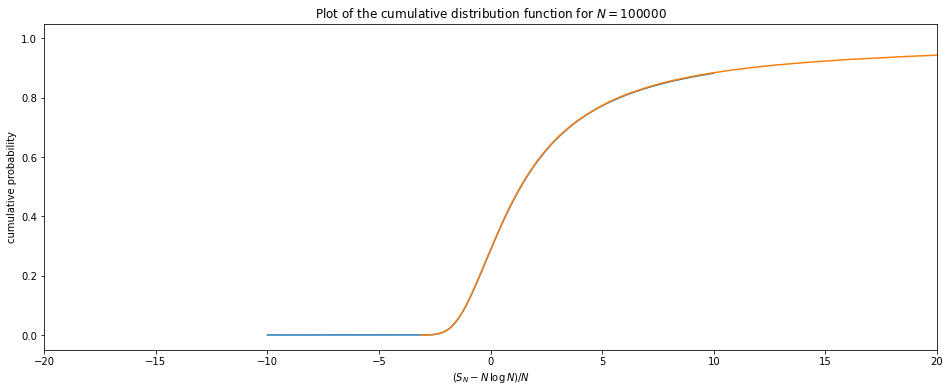

<ipython-input-31-a49efb01afa9>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-31-a49efb01afa9>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  right_int, right_err = scipy.integrate.quad(f, 0, 100)


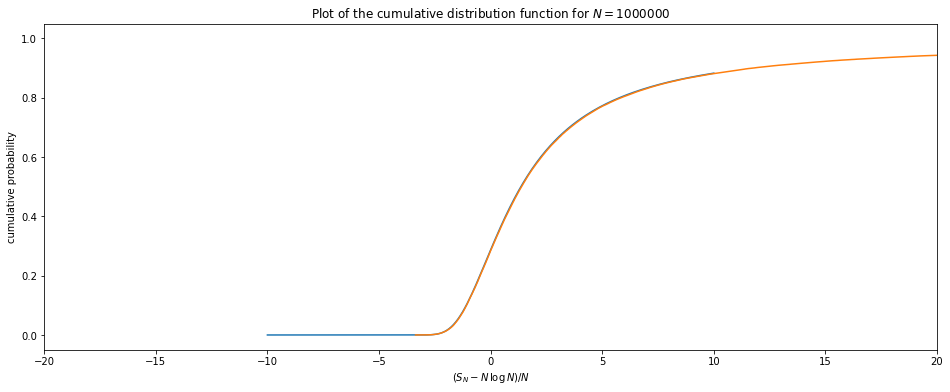

In [32]:
for many in [10, 100, 1000, 10000, 100000, 1000000]:
    p.figure(figsize=(16, 6))

    x = np.linspace(-10, 10, 200)
    y = [curlyj.cdf(_) for _ in x]
    p.title("Plot of the cumulative distribution function for $N = %d$" % many)
    p.plot(x, y)

    cdf(samples_for_n[many])
    p.xlabel("$(S_N - N\,\log\,N) / N$")
    p.ylabel("cumulative probability")
    p.xlim([-20, 20])
    p.show()

In [29]:
curlyj.cdf(10000)

value 10000.000000
estimated error is 2.340404e+00


<ipython-input-27-a389dddb1a16>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  left_int, left_err = scipy.integrate.quad(f, -100, 0)
<ipython-input-27-a389dddb1a16>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a spe

1.352581227057045

### Example walks with values of $q$ that are close to the conjectured critical value $q/(1-q) = \frac12 \log L$.

In [83]:
def draw():
    return int(np.floor(1/np.random.random()))

def walk(L, q, start):
    yield start
    while True:
        if np.random.random() < q:
            start -= 1
        else:
            if np.random.random() < 0.5:
                zz = draw()
                start += max(zz - start, 0)
                # whee
            else:
                start += draw()
        if start == 0:
            return start
        if start > L:
            start = L
        yield start

def conjectured_critical_q(L, shift=1):
    return 1 - 1/(1 + shift * 0.5 * np.log(L))


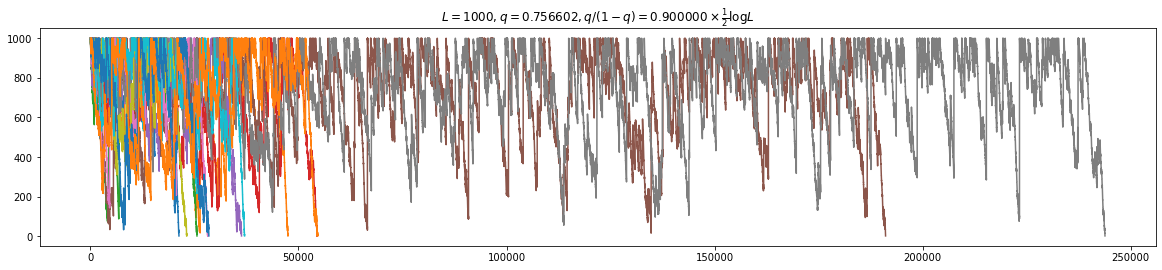

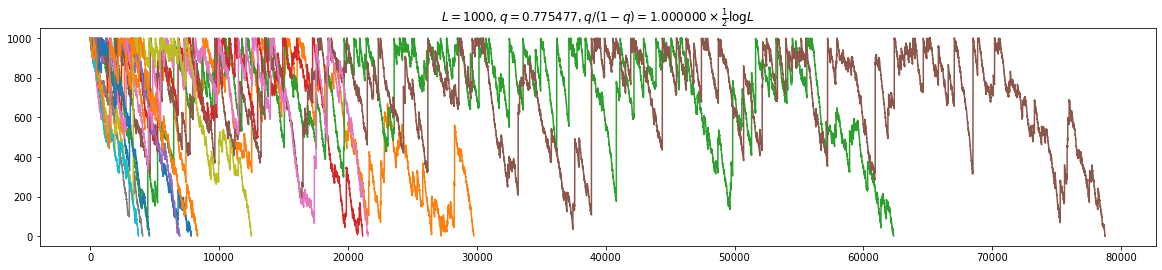

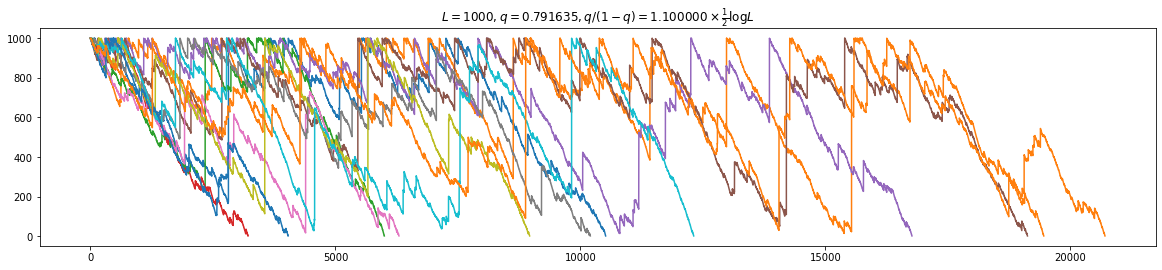

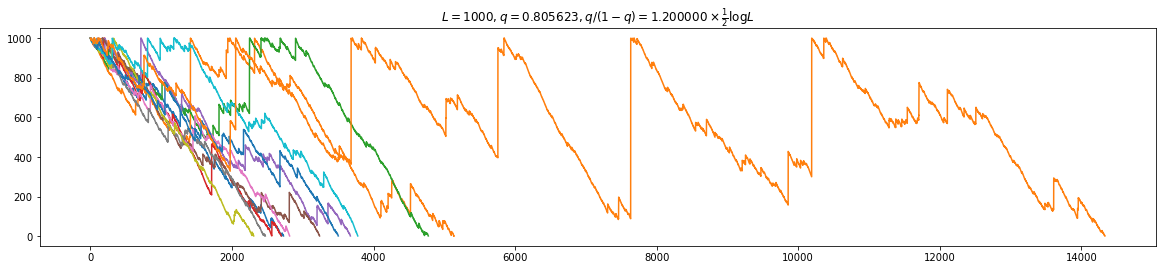

In [114]:
def make_plot(L, z):
    p.figure(figsize=(20, 4))
    qq = conjectured_critical_q(L, z)
    p.title("$L = %d, q = %f, q/(1-q) = %f \\times \\frac{1}{2} \\log L$" % (L,qq,z))
    for j in range(12):
        longwalk = list(walk(L, qq, L))
        p.plot(longwalk)
    p.show()

make_plot(1000, 0.9)
make_plot(1000, 1)
make_plot(1000, 1.1)
make_plot(1000, 1.2)

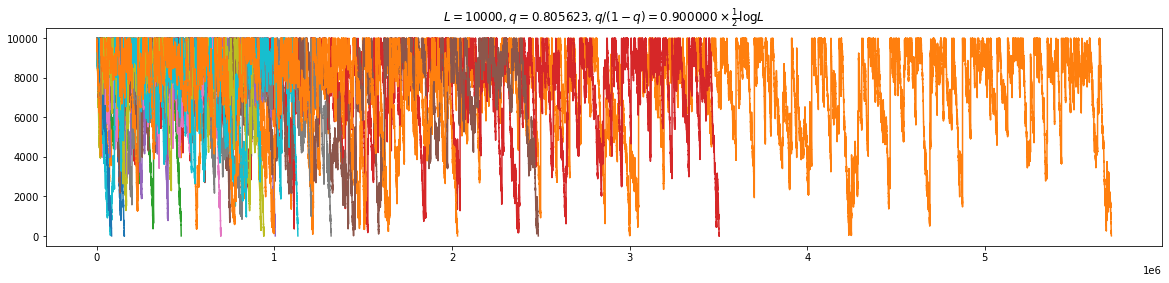

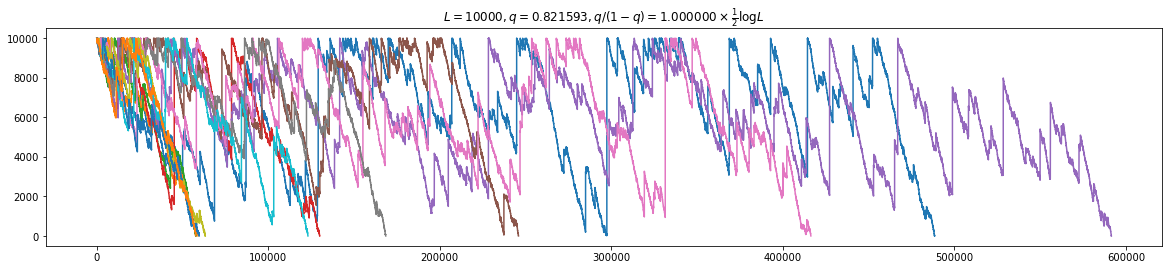

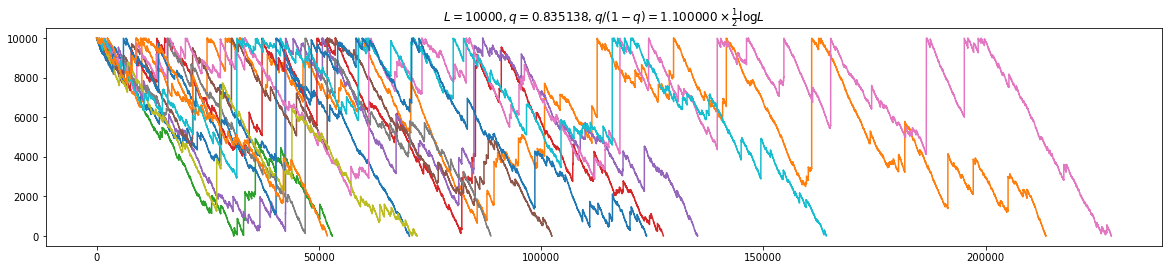

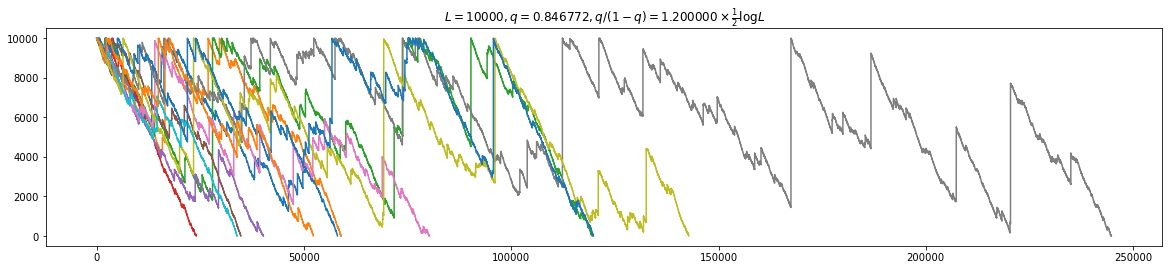

In [116]:
make_plot(10000, 0.9)
make_plot(10000, 1)
make_plot(10000, 1.1)
make_plot(10000, 1.2)

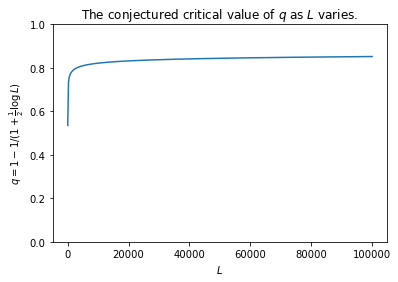

In [120]:
def _():
    x = np.linspace(10, 100000, 400)
    y = conjectured_critical_q(x)
    p.title("The conjectured critical value of $q$ as $L$ varies.")
    p.xlabel("$L$")
    p.ylabel("$q = 1 - 1/(1 + \\frac{1}{2} \\log\, L)$")
    p.ylim([0, 1])
    p.plot(x, y)
_()

### Truncated versions

We also want to study the truncated step $J \vee M$ or $(J - M) \vee 0$, because we take steps of the form $(J + 1 - x) \vee 0$ with probability $\frac12 (1 - q)$.

The characteristic function of $J \vee M$ is
$$F_M(\theta) = 1 + (e^{-i\theta} - 1) \log((1 - e^{i\theta}) + \sum_{j=1}^{M-1} {e^{i\theta M} - e^{i \theta j} \over j(j+1)}$$
Again, we look at the characteristic function of the sum of $N$ independent copies of $J \wedge M$, and how it acts around the point $\theta=0$. We will assume that $M \ll N$. Then
$$F_M(\theta) = 1 + -i\theta \log(-i\theta) (1 + O(\theta)) + (e^{i \theta M} - 1) - i\theta \sum_{j=1}^{M} {1 \over j+1} + O(\theta^2 M)$$
or
$$1 + -i \theta N \log(-i \theta) + i \theta (M - \log M - \gamma) + O(\theta^2 \log \theta + \theta^2M^2)$$

Let $S_N$ be the sum of $N$ independent copies of $J$. Its characteristic function is
$F(\theta)^N = [1 + (e^{-i\theta} - 1) \log(1 - e^{i\theta})]^N$.

Here $e^{-i\theta} - 1 = -i\theta (1 + O(\theta))$ and $\log(1 - e^{i\theta}) = \log(-i\theta) (1 + O(\theta))$, so

$$F(\theta)^N = \exp(-i \theta N \log(-i \theta) (1 + O(\theta))).$$

This is a nice formula. From this, we can easily get

$${S_N - N \log N \over N} \stackrel{d}{\to} \mathfrak J$$

where $\mathfrak J$ is a random variable with characteristic function $e^{-i\theta \log -i\theta} = e^{-\pi |\theta| / 2 - i \theta \log |\theta|}$.

I think that is the stable distribution for $\alpha = 1$ with $\mu = 0, c = \pi/2, \beta = 1$.